# Comparison of $\bar{\nu_{e}}$ scattering on a free proton in different generators 
Comparison is with:
- GENIE
- NuWro
- NEUT
- Achilles
- GiBUU

There were various modifications made to certain generators in order to make all generators match.
Main modifications:
- NuWro: Change the $G_{n}^{e}$ to $0$ as it was previously non-zero.
- Achilles: Change the $G_{n}^{e}$ to $0$ as it was previously non-zero.
- GiBUU: 

In [4]:
%%bash
pip install Uproot
pip install SciencePlots
pip install latex

Using legacy 'setup.py install' for latex, since package 'wheel' is not installed.
Using legacy 'setup.py install' for data, since package 'wheel' is not installed.
Using legacy 'setup.py install' for shutilwhich, since package 'wheel' is not installed.
Using legacy 'setup.py install' for tempdir, since package 'wheel' is not installed.
    Running setup.py install for tempdir: started
    Running setup.py install for tempdir: finished with status 'done'
    Running setup.py install for shutilwhich: started
    Running setup.py install for shutilwhich: finished with status 'done'
    Running setup.py install for data: started
    Running setup.py install for data: finished with status 'done'
    Running setup.py install for latex: started
    Running setup.py install for latex: finished with status 'done'


In [5]:
import uproot as up
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
print(plt.style.available)
plt.style.use(["science", "notebook", "grid"])
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"]})

['Solarize_Light2', '_classic_test_patch', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


In [79]:
def plot_flattree_diff_xsec(filename: str, kinematic: str, bin_width: float, label: str, color: str, tree_name: str, extra_weight: float):
    infile = up.open(filename)
    TTree_name = "FlatTree_VARS;" + tree_name
    TBranch_kinematic = infile[TTree_name][kinematic].array()
    XSec_scale_factor = max(infile[TTree_name]["fScaleFactor"].array())

    plt.hist(TBranch_kinematic, bins=np.arange(min(TBranch_kinematic), max(TBranch_kinematic)+0.01, step=bin_width), histtype='step', weights=extra_weight*XSec_scale_factor*np.ones_like(TBranch_kinematic)/(bin_width), color=color,linewidth=1, label = label)
    plt.legend(loc = "upper right")
    return 

def plot_flattree_diff_xsec_manual_scale(filename: str, kinematic: str, bin_width: float, label: str, color: str, tree_name: str, extra_weight: float):
    infile = up.open(filename)
    TTree_name = "FlatTree_VARS;" + tree_name
    TBranch_kinematic = infile[TTree_name][kinematic].array()

    plt.hist(TBranch_kinematic, bins=np.arange(min(TBranch_kinematic), max(TBranch_kinematic)+0.01, step=bin_width), histtype='step', weights=extra_weight*np.ones_like(TBranch_kinematic)/(bin_width), color=color,linewidth=1, label = label)
    plt.legend(loc = "upper right")
    return 

def format_axis(x_title: str, xunits: str, y_title: str, yunits: str, title: str):
    # plt.xlabel(r"$Q^{2}$ [GeV]")
    plt.xlabel(f"{x_title} [" + xunits + "]")
    plt.ylabel(f"{y_title} [" + yunits + "]")
    plt.title(f"{title}")

def plot_flattree_diff_xsec_with_cut(filename: str, kinematic: str, bin_width: float, label: str, color: str, tree_name: str, extra_weight: float):
    infile = up.open(filename)
    TTree_name = "FlatTree_VARS;" + tree_name
    TBranch_kinematic = infile[TTree_name][kinematic].array()
    XSec_scale_factor = max(infile[TTree_name]["fScaleFactor"].array())
    TBranch_cut = infile[TTree_name]["tgt"].array()

    TBranch_kinematic_cut = TBranch_kinematic[TBranch_cut == 1000010010]

    plt.hist(TBranch_kinematic_cut, bins=np.arange(min(TBranch_kinematic_cut), max(TBranch_kinematic_cut)+0.01, step=bin_width), histtype='step', weights=extra_weight*XSec_scale_factor*np.ones_like(TBranch_kinematic_cut)/(bin_width), color=color,linewidth=1, label = label)
    plt.legend(loc = "upper right")
    return 

def plot_flattree_diff_weighted_events(filename: str, kinematic: str, bin_width: float, label: str, color: str, tree_name: str, extra_weight: float):
    infile = up.open(filename)
    TTree_name = "FlatTree_VARS;" + tree_name
    TBranch_kinematic = infile[TTree_name][kinematic].array()
    XSec_scale_factor = max(infile[TTree_name]["fScaleFactor"].array())
    Weight = infile[TTree_name]["Weight"].array()

    plt.hist(TBranch_kinematic, bins=np.arange(min(TBranch_kinematic), max(TBranch_kinematic)+0.01, step=bin_width), histtype='step', weights=Weight*extra_weight*XSec_scale_factor*np.ones_like(TBranch_kinematic)/(bin_width), color=color,linewidth=1, label = label)
    plt.legend(loc = "upper right")
    return 

In [80]:
plt.figure(figsize=(10, 6))
width = 0.01
kinematic = "Q2" 

<Figure size 1000x600 with 0 Axes>

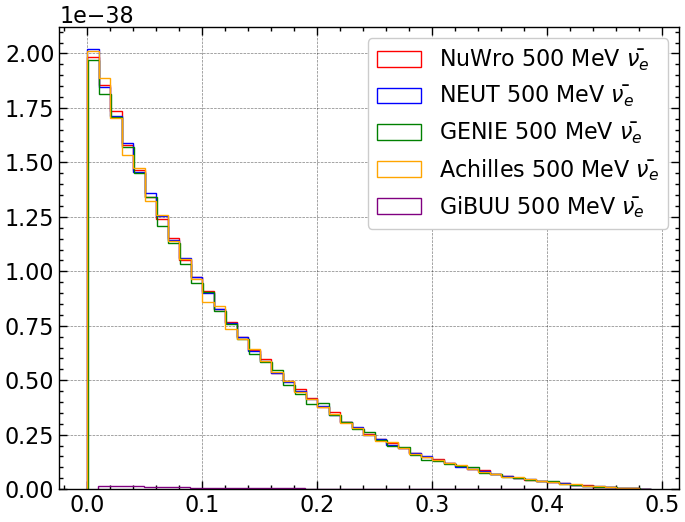

In [83]:
plot_flattree_diff_xsec_with_cut(filename = "zero_GEn/CH2_dipole_-12_500_CCQE.flat.root", kinematic = kinematic, bin_width = width, label = r"NuWro 500 MeV $\bar{\nu_{e}}$", color = 'red', tree_name = "8", extra_weight = 7.0)
plot_flattree_diff_xsec_with_cut(filename = "nieves_1.05_dipole_nueb_CH2_0.5GeV.nuisflat.root", kinematic = kinematic, bin_width = width, label = r"NEUT 500 MeV $\bar{\nu_{e}}$", color = 'blue', tree_name = "6", extra_weight = 7.0)
plot_flattree_diff_xsec_manual_scale(filename = "nueb_on_1000010010_500MeV_0.flat.root", kinematic = kinematic, bin_width = width, label = r"GENIE 500 MeV $\bar{\nu_{e}}$", color = 'green', tree_name = "1", extra_weight = 2.40510636325092*1e-44)
plot_flattree_diff_weighted_events(filename = "achilles_fixed_Gen_nuebar_500.flat.root", kinematic = kinematic, bin_width = width, label = r"Achilles 500 MeV $\bar{\nu_{e}}$", color = 'orange', tree_name = "1", extra_weight = 1.0)
# plot_flattree_diff_weighted_events(filename = "GiBUU_500mev_nuebar_fixedW.flat.root", kinematic = kinematic, bin_width = width, label = r"GiBUU 500 MeV $\bar{\nu_{e}}$", color = 'purple', tree_name = "2", extra_weight = 1.0)


# Below is the original code that is a mess
----
----

In [84]:
Nuwro_500mev = "zero_GEn/CH2_dipole_-12_500_CCQE.flat.root" 
NEUT_500mev = "nieves_1.05_dipole_nueb_CH2_0.5GeV.nuisflat.root" 
GENIE_500mev = "nueb_on_1000010010_500MeV_0.flat.root" 
# GENIE_500mev = "nueb_on_1000010010_2000MeV_0_normcheck.flat.root"
GENIE_500mev_old = "CCQE_nuebar_G18_10a_02_11a_0p5GeV.ghep.flat.root"
# Achilles_500mev = "Achilles_nuebar_500.hepmc.GenericVectors.root" 
Achilles_500mev = "achilles_fixed_Gen_nuebar_500.flat.root" 
GiBUU_500mev = "GiBUU_500mev_nuebar_fixedW.flat.root" 
# GiBUU_500mev = "EventOutput-ep-fixedW.Pert.nuis.flat.root" 
infile_nuwro = up.open(Nuwro_500mev)
infile_neut = up.open(NEUT_500mev)
infile_genie = up.open(GENIE_500mev)
infile_genie_old = up.open(GENIE_500mev_old)
infile_achilles = up.open(Achilles_500mev)
infile_gibuu = up.open(GiBUU_500mev)
# keys = infile.keys()
FlatTree1 = infile_nuwro["FlatTree_VARS;8"]
FlatTree2 = infile_neut["FlatTree_VARS;6"]
FlatTree3 = infile_genie["FlatTree_VARS;1"]
FlatTree4 = infile_achilles["FlatTree_VARS;1"]
FlatTree5 = infile_gibuu["FlatTree_VARS;2"]

['Mode', 'GENIEResCode', 'cc', 'PDGnu', 'Enu_true', 'tgt', 'tgta', 'tgtz', 'PDGLep', 'ELep', 'CosLep', 'Q2', 'q0', 'q3', 'Enu_QE', 'Q2_QE', 'W_nuc_rest', 'W', 'W_genie', 'x', 'y', 'Erecoil_minerva', 'Erecoil_charged', 'EavAlt', 'Emiss', 'pmiss', 'Emiss_preFSI', 'pmiss_preFSI', 'CosThetaAdler', 'PhiAdler', 'dalphat', 'dpt', 'dphit', 'pnreco_C', 'nfsp', 'px', 'py', 'pz', 'E', 'pdg', 'pdg_rank', 'ninitp', 'px_init', 'py_init', 'pz_init', 'E_init', 'pdg_init', 'nvertp', 'px_vert', 'py_vert', 'pz_vert', 'E_vert', 'pdg_vert', 'Weight', 'InputWeight', 'RWWeight', 'fScaleFactor', 'CustomWeight', 'CustomWeightArray', 'flagCCINC', 'flagNCINC', 'flagCCQE', 'flagCC0pi', 'flagCCQELike', 'flagNCEL', 'flagNC0pi', 'flagCCcoh', 'flagNCcoh', 'flagCC1pip', 'flagNC1pip', 'flagCC1pim', 'flagNC1pim', 'flagCC1pi0', 'flagNC1pi0', 'flagCC0piMINERvA', 'flagCC0Pi_T2K_AnaI', 'flagCC0Pi_T2K_AnaII']


In [42]:
kinematic = "Q2"
# kinematic = "CosLep"
# kinematic = "px"

In [85]:
tbranch_nuwro = infile_nuwro["FlatTree_VARS;8"][kinematic].array()
tbranch_nuwro_cut = infile_nuwro["FlatTree_VARS;8"]["tgt"].array()
tbranch_nuwro_scale = max(infile_nuwro["FlatTree_VARS;8"]["fScaleFactor"].array())

tbranch_neut = infile_neut["FlatTree_VARS;6"][kinematic].array()
tbranch_neut_cut = infile_neut["FlatTree_VARS;6"]["tgt"].array()
tbranch_neut_scale = max(infile_neut["FlatTree_VARS;6"]["fScaleFactor"].array())

tbranch_genie = infile_genie["FlatTree_VARS;1"][kinematic].array()
tbranch_genie_scale = max(infile_genie["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_genie_old = infile_genie_old["FlatTree_VARS;1"][kinematic].array()
tbranch_genie_scale_old = max(infile_genie_old["FlatTree_VARS;1"]["fScaleFactor"].array())

tbranch_achilles = infile_achilles["FlatTree_VARS;1"][kinematic].array()
tbranch_achilles_weight = infile_achilles["FlatTree_VARS;1"]["Weight"].array()
tbranch_achilles_scale = max(infile_achilles["FlatTree_VARS;1"]["fScaleFactor"].array())


tbranch_gibuu = infile_gibuu["FlatTree_VARS;3"]["Q2"].array()
tbranch_gibuu_weight = infile_gibuu["FlatTree_VARS;3"]["Weight"].array()
tbranch_gibuu_weight = tbranch_gibuu_weight[tbranch_gibuu > 0.1]
tbranch_gibuu = tbranch_gibuu[tbranch_gibuu > 0.1]
tbranch_gibuu_scale = max(infile_gibuu["FlatTree_VARS;3"]["fScaleFactor"].array())

In [13]:
print(tbranch_genie_scale*np.size(tbranch_genie))
print(7*tbranch_neut_scale*np.size(tbranch_neut))

6.133786334336972e-39
6.141186431050302e-39


In [86]:
tbranch_nuwro = tbranch_nuwro[tbranch_nuwro_cut == 1000010010]
# tbranch1_scale = tbranch1_scale[tbranch1_cut == 1000010010] 
tbranch_neut = tbranch_neut[tbranch_neut_cut == 1000010010]
# tbranch2_scale = tbranch2_scale[tbranch2_cut == 1000010010] 

# print(tbranch1_scale)

# tbranch3 = tbranch3[tbranch3_cut == 1000010010]

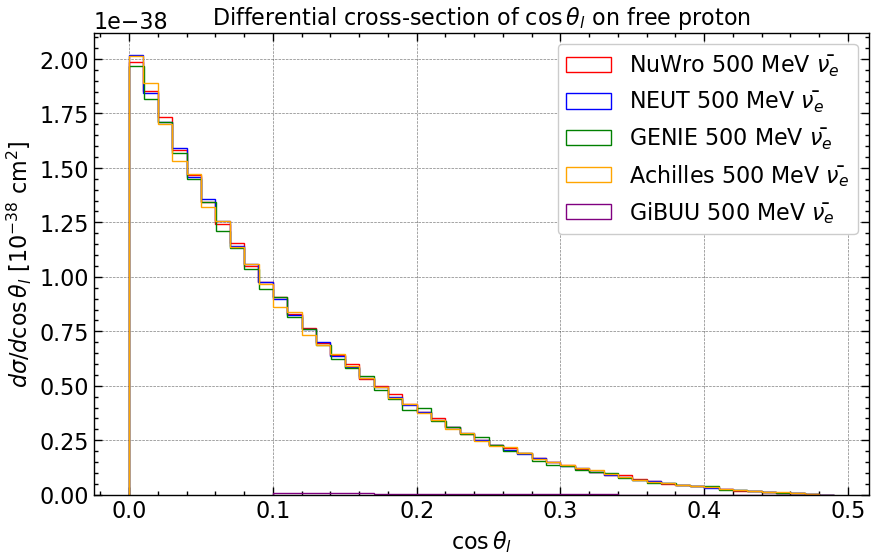

In [87]:
plt.figure(figsize=(10, 6))

plt.hist(tbranch_nuwro, bins=np.arange(min(tbranch_nuwro), max(tbranch_nuwro)+0.01, step=0.01), histtype='step', weights=7*tbranch_nuwro_scale*np.ones_like(tbranch_nuwro)/(0.01), color='red',linewidth=1, label = r"NuWro 500 MeV $\bar{\nu_{e}}$")
plt.hist(tbranch_neut, bins=np.arange(min(tbranch_neut), max(tbranch_neut)+0.01, step=0.01), histtype='step', weights=7*tbranch_neut_scale*np.ones_like(tbranch_neut)/(0.01), color='blue',linewidth=1, label = r"NEUT 500 MeV $\bar{\nu_{e}}$")
plt.hist(tbranch_genie, bins=np.arange(min(tbranch_genie), max(tbranch_genie)+0.01, step=0.01), histtype='step', weights=2.40510636325092*1e-44*np.ones_like(tbranch_genie)/(0.01), color='green',linewidth=1, label = r"GENIE 500 MeV $\bar{\nu_{e}}$")
plt.hist(tbranch_achilles, bins=np.arange(min(tbranch_achilles), max(tbranch_achilles)+0.01, step=0.01), histtype='step', weights=tbranch_achilles_scale*tbranch_achilles_weight/(0.01), color='orange',linewidth=1, label = r"Achilles 500 MeV $\bar{\nu_{e}}$")
plt.hist(tbranch_gibuu, bins=np.arange(min(tbranch_gibuu), max(tbranch_gibuu)+0.01, step=0.01), histtype='step', weights=tbranch_gibuu_scale*tbranch_gibuu_weight/(0.01), color='purple',linewidth=1, label = r"GiBUU 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch1, bins=100, histtype='step', density=True, weights=tbranch1_scale*np.ones_like(tbranch1)/14., color='red',linewidth=1, label = r"NuWro 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch2, bins=100, histtype='step', color='blue', density=True,linewidth=1, label = r"NEUT 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch3, bins=100, histtype='step', color='green', density=True, linewidth=1, label = r"GENIE 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch4, bins=100, weights=tbranch4_weight, histtype='step', color='orange', density=True, linewidth=1, label = r"Achilles 500 MeV $\bar{\nu_{e}}$")
# plt.hist(tbranch_gibuu, bins=100, weights=tbranch_gibuu_weight, histtype='step', color='purple', density=False, linewidth=1, label = r"GiBUU 500 MeV $\bar{\nu_{e}}$")

# plt.xlabel(r"$Q^{2}$ [GeV]")
plt.xlabel(r"$\cos \theta_{l}$")
plt.ylabel(r"$d\sigma/d\cos \theta_{l}$ [$10^{-38}$ cm$^{2}$]")
# plt.ylabel(r"Normalized Events")
plt.legend(loc="upper right")
plt.title(r"Differential cross-section of $\cos \theta_{l}$ on free proton")

plt.savefig("Diff-xsec-CosLep_comparison_500mev.png")
# plt.savefig("GiBUU_shape_Q2_comparison_500mev.png")
plt.show()

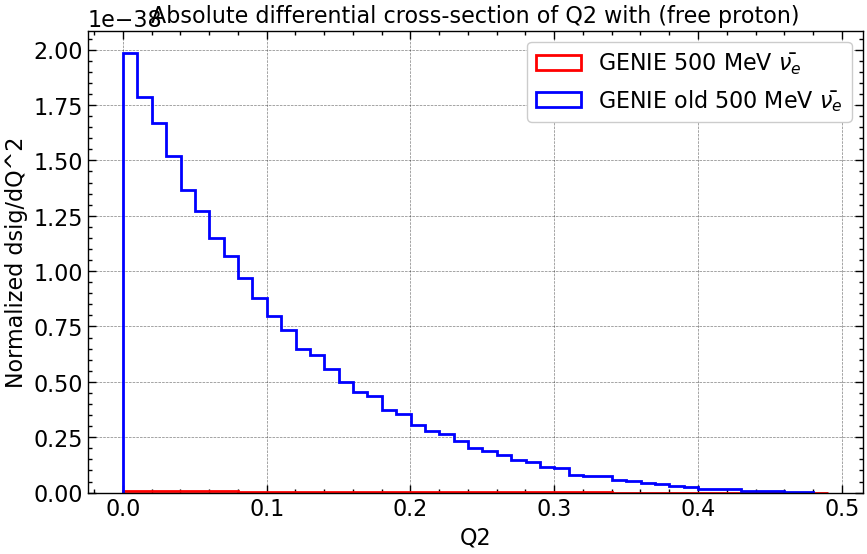

In [10]:
plt.figure(figsize=(10, 6))

plt.hist(tbranch_genie, bins=np.arange(min(tbranch_genie), max(tbranch_genie)+0.01, step=0.01), histtype='step', weights=tbranch_genie_scale*np.ones_like(tbranch_genie)/(0.01), color='red',linewidth=2, label = r"GENIE 500 MeV $\bar{\nu_{e}}$")
plt.hist(tbranch_genie_old, bins=np.arange(min(tbranch_genie_old), max(tbranch_genie_old)+0.01, step=0.01), histtype='step', weights=tbranch_genie_scale_old*np.ones_like(tbranch_genie_old)/(0.01), color='blue',linewidth=2, label = r"GENIE old 500 MeV $\bar{\nu_{e}}$")

plt.xlabel("Q2")
plt.ylabel("Normalized dsig/dQ^2")
plt.legend()
plt.title(f"Absolute differential cross-section of Q2 with (free proton)")

# plt.savefig("Shape_comparison_500mev.png")
plt.show()